<a href="https://colab.research.google.com/github/tanongsakintean/machineLearning-basic/blob/main/Chapter_3_Hierarchical_Clustering_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering Model in 5 Steps with Python
We have a dataset consist of 200 mall customers data. The data frame includes the customerID, genre, age, annual income and spending score of each customer. Spending score is a score that the amount computed for each of their clients based on several criteria including, for instance, their income, the number of times per week they come to the mall and the money they spent in a year. This score is between 1–100. What makes a business problem a clustering problem because we don’t know what the answers are. We don’t know the final categories for the data. So that our target is to find some unknown clusters of the customers.

# #1 Importing the libraries

In [48]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os # use commandline
from google.colab import files
import io

uploaded = files.upload()
dataset = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))
X = dataset.iloc[:, [3,4]].values

Saving Mall_Customers.csv to Mall_Customers.csv


In [49]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# #2 Using the dendrogram to find the optimal numbers of clusters.

In hierarchical clustering, this new step also consists of finding the optimal number of clusters. Only this time we’re not going to use the elbow method. We are going to use the dendrogram.

**Ward** method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster. Below is the dendrogram diagram.

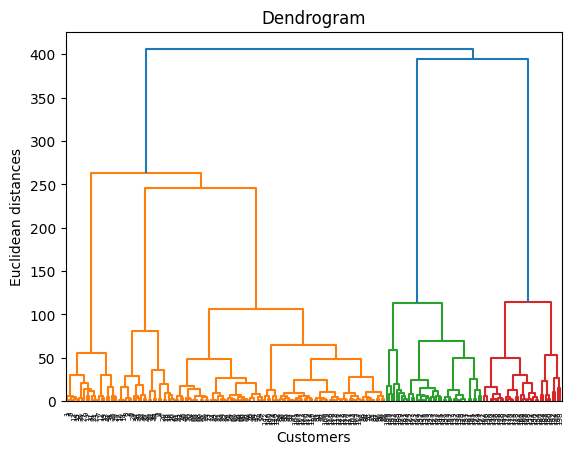

In [50]:

# First thing we're going to do is to import scipy library. scipy is #an open source Python library that contains tools to do #hierarchical clustering and building dendrograms. Only import the #needed tool.
import scipy.cluster.hierarchy as sch
#Lets create a dendrogram variable linkage is actually the algorithm #itself of hierarchical clustering and then in linkage we have to #specify on which data we apply and engage. This is X dataset
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward")) #เป็น หาค่าน้อยที่สุดในการจัดกลุ่ม
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

The x-axis consists of the customers and y-axis consists of the Euclidean distance between the clusters. How do we determine the optimal number of clusters from this diagram? We look for the largest distance that we can vertically without crossing any horizontal line and this one is the red framed line on the above diagram. Let's count the number of lines on the diagram and determine the optimal number of clusters. Cluster number will be 5 for this dataset.


# 3 Fitting hierarchical clustering to the Mall_Customes dataset

In [40]:

# There are two algorithms for hierarchical clustering: #Agglomerative Hierarchical Clustering and
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our algorithm class
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
# AgglomerativeClustering  จัดกลุ่มให้ดูว่า ในแต่ละ instance อยู๋กลุ่มใด
# Lets try to fit the hierarchical clustering algorithm  to dataset #X while creating the clusters vector that tells for each customer #which cluster the customer belongs to.
y_hc=hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [41]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

#5 Visualizing the clusters. This code is similar to k-means visualization code.
 We only replace the y_kmeans vector name to #y_hc for the hierarchical clustering

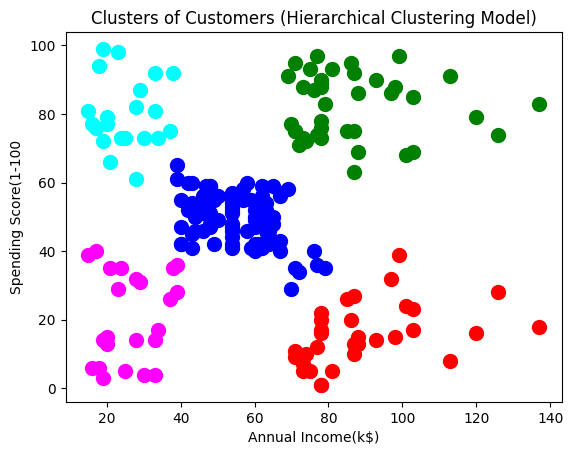

In [42]:

plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1') #y_hc== ถ้า แกน x อยู่ในกลุ่ม 0
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

Let’s define these clusters as the customers' segment of a mall. นัก data sci ต้องตีความเอง
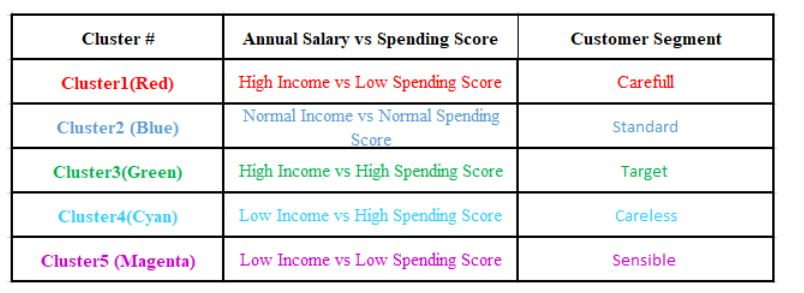

# Exercises
ให้นักศึกษาสร้าง dendogram จากชุดข้อมูล bmw-browsers.csv  โดยใช้ attribute ทุกตัวยกเว้น Customer ID ในการจัดกลุ่มและหาจำนวนกลุ่มที่คิดว่าเหมาะสมสำหรับชุดข้อมูลนี้

In [45]:
uploaded = files.upload()
bmw = pd.read_csv(io.BytesIO(uploaded['bmw-browsers.csv']))
bmw = bmw.iloc[:, 1:9].values

Saving bmw-browsers.csv to bmw-browsers.csv


In [46]:
bmw

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 1, 1],
       [1, 0, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 0, 1, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 1, 1, 0],
       [1, 0, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 1, 1],
       [1, 0, 1, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 1, 1],
       [1, 0, 1, 0, 0, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 1, 1, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 0],
       [1,

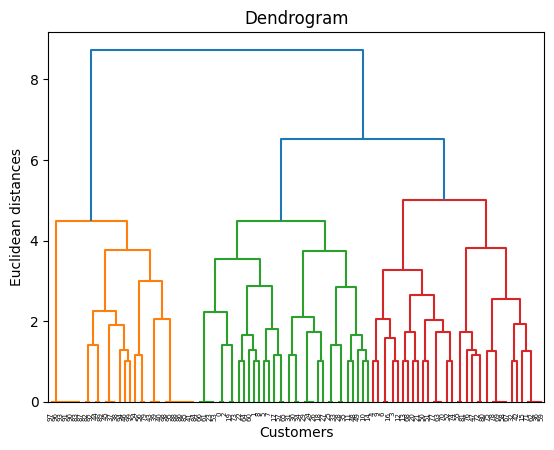

In [47]:

# First thing we're going to do is to import scipy library. scipy is #an open source Python library that contains tools to do #hierarchical clustering and building dendrograms. Only import the #needed tool.
import scipy.cluster.hierarchy as sch
#Lets create a dendrogram variable linkage is actually the algorithm #itself of hierarchical clustering and then in linkage we have to #specify on which data we apply and engage. This is X dataset
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

dendrogram = sch.dendrogram(sch.linkage(bmw, method  = "ward")) #เป็น หาค่าน้อยที่สุดในการจัดกลุ่ม
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()